In [15]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts
import my_library.gluex_style as gxs 
import os

In [16]:
ROOT.EnableImplicitMT()
os.nice(18)

19

In [24]:
df = tools.get_dataframe('pipkmks', 'gluex1', 'data').Filter('abs(pipkmks_m - 1.28) <= 0.028')
df = df.Define('kk_px', 'km_px + ks_px')
df = df.Define('kk_py', 'km_py + ks_py')
df = df.Define('kk_pz', 'km_pz + ks_pz')
df = df.Define('kk_E', 'km_E + ks_E')
df = df.Define('kk_m', 'sqrt(kk_E*kk_E - kk_px*kk_px - kk_py*kk_py - kk_pz*kk_pz)')


In [31]:
hist_kk = df.Histo1D(('hist_kk', ';M(K^{+}K^{-}) [GeV]', 50, 0.988, 1.152), 'kk_m')
hist_kspip = df.Histo1D(('hist_kspip', ';M(K_s#pi^{+}) [GeV]', 50, 0.628, 0.8), 'kspip_m')
hist_kmpip = df.Histo1D(('hist_kmpip', ';M(K^{-}#pi^{+}) [GeV]', 50, 0.628, 0.8), 'kmpip_m')
df.Count().GetValue()

18080

In [32]:
hist_kk.Scale(1/hist_kk.Integral())
hist_kspip.Scale(1/hist_kspip.Integral())
hist_kmpip.Scale(1/hist_kmpip.Integral())

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


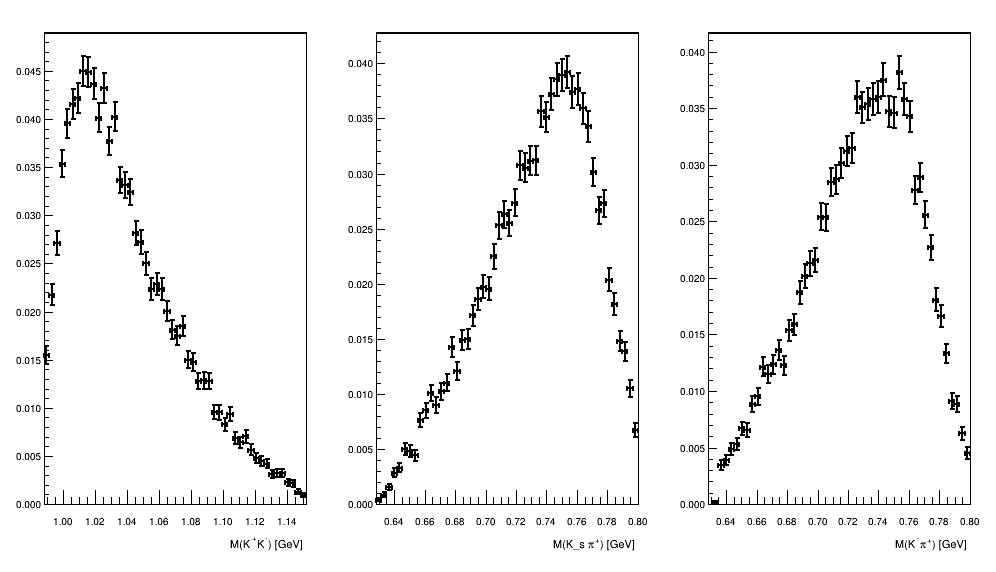

In [33]:
c = ROOT.TCanvas('c', 'c', 1000, 600)
c.Divide(3, 1)
c.cd(1)
hist_kk.Draw("E1")
c.cd(2)
hist_kspip.Draw("E1")
c.cd(3)
hist_kmpip.Draw("E1")
c.Draw()

